In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dateparser = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')

bseg = pd.read_csv("14\BSEG_15_16_17_internal_market.txt", delim_whitespace=True, dtype = {'HKONT': str, 'MENGE': float},
                       parse_dates=['H_BUDAT', 'H_BLDAT', 'VALUT'], date_parser=dateparser, thousands='.', decimal=',')
print(bseg.shape)
bseg.drop_duplicates(subset=['VALUT','DMBTR'],inplace=True)
print(bseg.shape)

(7548, 13)
(6984, 13)


In [3]:
bseg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6984 entries, 0 to 7545
Data columns (total 13 columns):
H_BUDAT    6984 non-null datetime64[ns]
H_BLDAT    6984 non-null datetime64[ns]
VALUT      6984 non-null datetime64[ns]
DMBTR      6984 non-null float64
H_HWAER    6984 non-null object
WRBTR      6984 non-null float64
H_WAERS    6984 non-null object
MATNR      6984 non-null object
MENGE      6984 non-null float64
MEINS      3606 non-null object
WERKS      3606 non-null float64
GJAHR      3606 non-null float64
HKONT      3606 non-null object
dtypes: datetime64[ns](3), float64(5), object(5)
memory usage: 763.9+ KB


In [4]:
bseg_cleared = bseg.drop(['MEINS','H_HWAER','WRBTR','H_WAERS','WERKS'], axis=1, inplace=False)

In [5]:
bseg_cleared.head()

,H_BUDAT,H_BLDAT,VALUT,DMBTR,MATNR,MENGE,GJAHR,HKONT
0,2017-01-08,2017-01-08,2017-01-09,28604580.48,S_0102100_0392,1.000720e+03,2017.0,9011010100
1,2017-01-08,2017-01-08,2017-01-09,5148824.55,2017,9.011010e+09,NaN,NaN
2,2017-01-08,2017-01-08,2017-01-09,1357747.80,S_0102100_0568,3.977000e+01,2017.0,9011010100
3,2017-01-08,2017-01-08,2017-01-09,244394.60,2017,9.011010e+09,NaN,NaN
4,2017-01-08,2017-01-08,2017-01-09,680299.20,S_0102100_0392,2.380000e+01,2017.0,9011010100


Data without VAT:

In [6]:
bseg_wh_nds = bseg_cleared[bseg_cleared.MENGE != 9011010101].copy()

In [7]:
bseg_wh_nds.drop(['HKONT'], axis=1, inplace=True)
bseg_wh_nds.head()

,H_BUDAT,H_BLDAT,VALUT,DMBTR,MATNR,MENGE,GJAHR
0,2017-01-08,2017-01-08,2017-01-09,28604580.48,S_0102100_0392,1000.72,2017.0
2,2017-01-08,2017-01-08,2017-01-09,1357747.80,S_0102100_0568,39.77,2017.0
4,2017-01-08,2017-01-08,2017-01-09,680299.20,S_0102100_0392,23.80,2017.0
6,2017-01-08,2017-01-08,2017-01-09,1362885.12,S_0102100_0392,47.68,2017.0
8,2017-01-08,2017-01-08,2017-01-09,316365.07,S_0102100_0445,11.41,2017.0


In [8]:
bseg_wh_nds['VALUT_DAY'] = [full_data.day for full_data in bseg_wh_nds.VALUT]
bseg_wh_nds['VALUT_MONTH'] = [full_data.month for full_data in bseg_wh_nds.VALUT]
bseg_wh_nds['VALUT_YEAR'] = [full_data.year for full_data in bseg_wh_nds.VALUT]

In [9]:
data = bseg_wh_nds[['VALUT','VALUT_DAY','VALUT_MONTH','VALUT_YEAR', 'DMBTR','MATNR', 'MENGE', 'GJAHR']].copy().reset_index()

In [10]:
data.drop(['index'], axis=1, inplace=True)

## Let's look at plots:




## By days:

In [11]:
cash = data[['VALUT','VALUT_DAY','VALUT_MONTH','VALUT_YEAR', 'DMBTR']].copy()

In [12]:
byday = cash.groupby(by=['VALUT','VALUT_MONTH', 'VALUT_YEAR', 'VALUT_DAY']).sum().reset_index()

In [13]:
byday.head()

,VALUT,VALUT_MONTH,VALUT_YEAR,VALUT_DAY,DMBTR
0,2015-01-04,1,2015,4,2.204765e+07
1,2015-01-13,1,2015,13,1.313837e+09
2,2015-01-14,1,2015,14,1.126478e+08
3,2015-01-15,1,2015,15,1.160271e+08
4,2015-01-22,1,2015,22,1.175343e+08


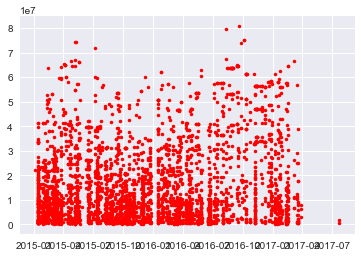

In [14]:
plt.plot(data['VALUT'], data['DMBTR'], 'r.')

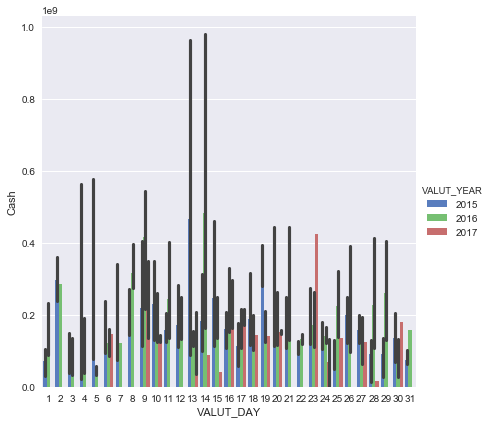

In [15]:
g = sns.factorplot(x="VALUT_DAY", y="DMBTR", data=byday, hue='VALUT_YEAR',
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Cash")

## By month

In [16]:
bymonth = cash.groupby(by=['VALUT_MONTH', 'VALUT_YEAR']).sum().reset_index()

In [17]:
bymonth.head()

,VALUT_MONTH,VALUT_YEAR,VALUT_DAY,DMBTR
0,1,2015,3698,2.113848e+09
1,1,2016,2053,2.157970e+09
2,1,2017,2994,2.456724e+09
3,2,2015,2460,2.330552e+09
4,2,2016,1981,2.270065e+09


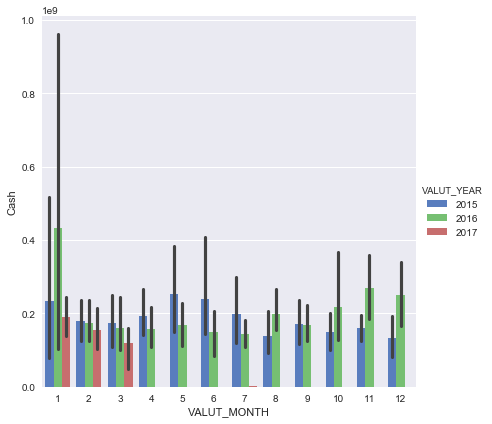

In [18]:
g = sns.factorplot(x="VALUT_MONTH", y="DMBTR", data=byday, hue='VALUT_YEAR',
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Cash")

In [40]:
series = pd.Series(data=bymonth.DMBTR)
series.describe()

count    2.800000e+01
mean     2.035559e+09
std      7.447068e+08
min      2.360597e+06
25%      1.671058e+09
50%      2.135567e+09
75%      2.471889e+09
max      3.191741e+09
Name: DMBTR, dtype: float64

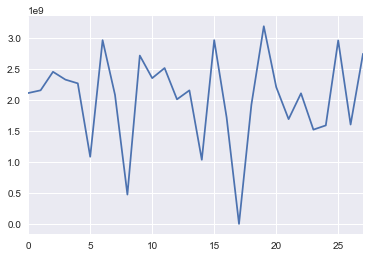

In [41]:
series.plot()

In [44]:
from statsmodels.tsa.stattools import adfuller

In [48]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.690939
p-value: 0.000001
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630


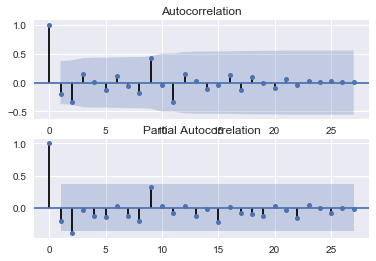

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [53]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(series)), series, test_size=0.2, shuffle=False)

In [ ]:
for i in range(len(y_test)):
    model = ARIMA(y_train, order=(0,0,1))
    model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]

In [ ]:
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)